In [84]:
import pandas as pd

In [85]:
# READING DATA
data = pd.read_csv('./DATA/raw', sep='\t', header=None, names=['label', 'content'])

In [86]:
data

,label,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
# PART 1 -- DATA PREPROCESSING --

In [113]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

# FIRST TIME MIGHT NEED BELOW CODE
# import nltk
# nltk.download('punkt')
# nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/lukasxue/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lukasxue/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [88]:
# Getting all the emails
emails = []
for value in data.values:
    emails.append(value[1])

In [94]:
# Remove punctuations & Tokenization
emails_no_punc = []
for email in emails:
    no_punc = [ch for ch in email if ch not in string.punctuation]
    no_punc = ''.join(no_punc).split()
    emails_no_punc.append(no_punc)

In [106]:
# Stemming
stemmer = PorterStemmer()
emails_no_punc_stemmed = []
for email in emails_no_punc:
    stem = []
    for word in email:
        stem.append(stemmer.stem(word))
    emails_no_punc_stemmed.append(stem)

In [117]:
# Remove Stop Words
from nltk.corpus import stopwords
emails_no_punc_stemmed_no_stopword = []
for email in emails_no_punc_stemmed:
    no_stop_word = [word.lower() for word in email if 
                    word.lower() not in stopwords.words('english')]
    emails_no_punc_stemmed_no_stopword.append(no_stop_word)

In [118]:
# PART 2 -- DATA EXPLORATION & VISUALIZATION --

In [119]:
# Getting labels
label = []
for value in data.values:
    label.append(value[0])

In [120]:
# Getting frequent itemset of size 1
ham_words = []
spam_words = []
for i in range(len(label)):
    if label[i] == 'ham':
        for word in emails_no_punc_stemmed_no_stopword[i]:
            ham_words.append(word)
    else:
        for word in emails_no_punc_stemmed_no_stopword[i]:
            spam_words.append(word)

In [121]:
from collections import Counter

In [122]:
ham_count = Counter(ham_words)
spam_count = Counter(spam_words)

In [125]:
ham_count.most_common(20)

[('u', 985),
 ('im', 452),
 ('go', 417),
 ('get', 360),
 ('2', 309),
 ('come', 295),
 ('call', 289),
 ('ltgt', 276),
 ('ok', 273),
 ('dont', 265),
 ('ur', 246),
 ('thi', 245),
 ('like', 244),
 ('know', 244),
 ('ill', 240),
 ('love', 239),
 ('got', 232),
 ('wa', 225),
 ('good', 225),
 ('time', 219)]

In [126]:
spam_count.most_common(20)

[('call', 366),
 ('free', 216),
 ('2', 173),
 ('txt', 163),
 ('u', 147),
 ('ur', 144),
 ('text', 138),
 ('mobil', 135),
 ('4', 119),
 ('claim', 115),
 ('stop', 115),
 ('repli', 109),
 ('prize', 94),
 ('get', 87),
 ('thi', 87),
 ('onli', 79),
 ('tone', 73),
 ('new', 72),
 ('servic', 72),
 ('send', 70)]

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [132]:
df_ham_30 = pd.DataFrame(ham_count.most_common(30), columns=['word', 'count'])
df_spam_30 = pd.DataFrame(spam_count.most_common(30), columns=['word', 'count'])

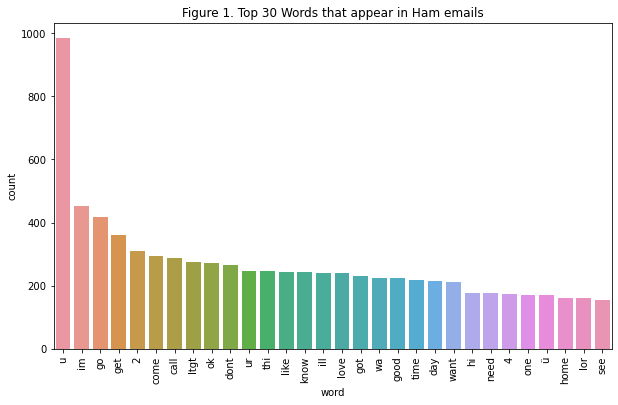

In [138]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='word', y='count', data=df_ham_30, ax=ax)
plt.title("Figure 1. Top 30 Words that appear in Ham emails")
plt.xticks(rotation='vertical');

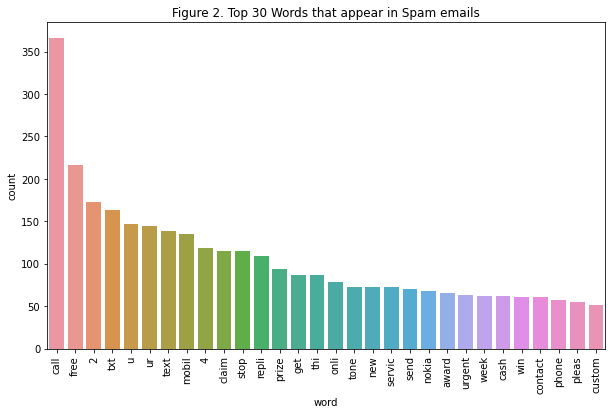

In [139]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='word', y='count', data=df_spam_30, ax=ax)
plt.title("Figure 2. Top 30 Words that appear in Spam emails")
plt.xticks(rotation='vertical');